자자 파이토치를 속성으로 빠르게 배워보자. ai를 이용해서 필요한 것들만 한 번 빠르게 배워보자.

우선은 간단하게 mnist숫자 이미지 데이터를 분류하는 모델을 만들어보자.

# 데이터 다운로드

파일들을 다운로드 했는데 csv파일이 아니라 IDX형식이라는 MNIST데이터셋 고유의 바이너리 형식으로 저장됨. 그리고 데이터와 레이블이 별개의 파일로 다운로드 됨. 

train이 붙은게 훈련용 데이터 60000개 샘플이고, t10k라고 붙은게 테스트용 10000개의 샘플이다.

처음에는 다운로드 된 파일에 직접 접근해서 읽어오는 것인가 했는데 아님. train_dataset_raw 객체에 이미지는 PIL로 저장되어있고, 레이블도 함께 묶여있댜.

In [11]:
import torch
from torchvision import datasets
import os

# datasets 디렉터리 생성 (이미 존재하면 무시)
os.makedirs('./datasets', exist_ok=True)

# MNIST 데이터셋 다운로드 및 저장
train_dataset_raw = datasets.MNIST(
    root='./datasets',
    train=True,
    download=True
)

test_dataset_raw = datasets.MNIST(
    root='./datasets',
    train=False,
    download=True
)

print("MNIST 데이터셋이 datasets 디렉터리에 다운로드 되었습니다.")

MNIST 데이터셋이 datasets 디렉터리에 다운로드 되었습니다.


# 데이터셋 준비

In [20]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader, random_split, Dataset
import numpy as np
import os

# # datasets 디렉터리 생성
# os.makedirs('./datasets', exist_ok=True)

# # 다운로드만 먼저 수행
# train_dataset_raw = datasets.MNIST(root='./datasets', train=True, download=True)
# test_dataset_raw = datasets.MNIST(root='./datasets', train=False, download=True)

# print("MNIST 데이터셋이 다운로드 되었습니다.")

# 커스텀 Dataset 클래스 정의 (정규화 포함)
class NormalizedMNIST(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        # PIL 이미지를 텐서로 변환하고 0~1로 정규화
        image = torch.tensor(np.array(image), dtype=torch.float32) / 255.0 # 이제 지금 무슨 PIL이미지로 저장이 되어 있다고 나와서 np.array()로 한 번 감싸주었음. 그래야 제대로 텐서로 변한됨.
        return image, label

# 정규화된 Dataset 생성
train_dataset = NormalizedMNIST(train_dataset_raw)
test_dataset = NormalizedMNIST(test_dataset_raw)

# 훈련 데이터에서 검증 데이터 분리
train_size = len(train_dataset)
val_size = 10000
new_train_size = train_size - val_size
train_subset, val_subset = random_split(train_dataset, [new_train_size, val_size])

# DataLoader 설정, 훈련 데이터를 배치로 묶어서 제공한다. 여기에서 셔플도 수행함.
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"훈련 데이터 크기: {len(train_subset)}, 검증 데이터 크기: {len(val_subset)}, 테스트 데이터 크기: {len(test_dataset)}")
print("MNIST 데이터셋이 정규화되고, 훈련/검증/테스트 DataLoader로 준비되었습니다.")

훈련 데이터 크기: 50000, 검증 데이터 크기: 10000, 테스트 데이터 크기: 10000
MNIST 데이터셋이 정규화되고, 훈련/검증/테스트 DataLoader로 준비되었습니다.


torch.Size([32, 28, 28])
torch.Size([32])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3882, 0.9686, 0.9451,
         0.13

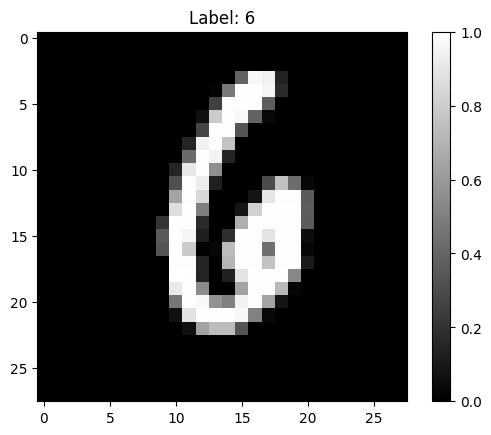

In [22]:
first_batch = next(iter(train_loader))
images, labels = first_batch
print(images.shape)
print(labels.shape)
print(images[0])
print(labels[0])

import matplotlib.pyplot as plt

# 시각화할 이미지 선택 (첫 번째 이미지)
image_to_visualize = images[0]

# 텐서를 NumPy 배열로 변환하고, 차원을 조정
image_to_visualize = image_to_visualize.squeeze().numpy()

# 이미지 시각화
plt.imshow(image_to_visualize, cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.colorbar()
plt.show()

# 모델 구조 작성

In [23]:
import torch
import torch.nn as nn

# 2. MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()  # 28x28 이미지를 784로 펼침
        self.layers = nn.Sequential(
            nn.Linear(784, 256),  # 입력층 -> 은닉층1
            nn.ReLU(),
            nn.Linear(256, 128),  # 은닉층1 -> 은닉층2
            nn.ReLU(),
            nn.Linear(128, 10)    # 은닉층2 -> 출력층 (10개 클래스)
            # 왜 SoftMax함수를 통과시키지 않는 것인가 궁금했는데, nn.CrossEntropyLoss 손실함수가 내부적으로 소프트맥스 계산을 수행하기 때문에 추가할 필요가 없음.
        )
    
    def forward(self, x):
        x = self.flatten(x)  # (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = self.layers(x)
        return x

In [24]:
# torchinfo로 텐서플로우의 summary()함수처럼 모델의 구조를 도식화해서 표현할 수 있다.
from torchinfo import summary

model = MLP()
summary(model, input_size=(32,28,28)) # 배치 크기와 입력 크기를 지정

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Sequential: 1-2                        [32, 10]                  --
│    └─Linear: 2-1                       [32, 256]                 200,960
│    └─ReLU: 2-2                         [32, 256]                 --
│    └─Linear: 2-3                       [32, 128]                 32,896
│    └─ReLU: 2-4                         [32, 128]                 --
│    └─Linear: 2-5                       [32, 10]                  1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
Total mult-adds (M): 7.52
Input size (MB): 0.10
Forward/backward pass size (MB): 0.10
Params size (MB): 0.94
Estimated Total Size (MB): 1.14

# 모델 훈련

In [25]:
# 맥 GPU 사용 가능 여부 확인
import torch

print(f"MPS 장치를 지원하도록 build가 되었는가? {torch.backends.mps.is_built()}")
print(f"MPS 장치가 사용 가능한가? {torch.backends.mps.is_available()}") 

MPS 장치를 지원하도록 build가 되었는가? True
MPS 장치가 사용 가능한가? True


일단은 가장 기본적인 훈련 코드를 작성해봄. 

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

# 3. 모델, 손실 함수, 옵티마이저 설정
device = torch.device("mps")
model = MLP().to(device)
loss_fn = nn.CrossEntropyLoss()  # 분류 문제에 적합한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저

# 훈련 함수와 검증 함수, 아래 훈련 루프에서 두 함수를 호출한다.

# 4. 훈련 함수
def train(model, train_loader, loss_fn, optimizer, device):
    model.train() # 모델을 훈련 모드로 설정
    running_loss = 0.0 # 에포크 동안 손실과 정확도를 추적하기 위한 변수들을 초기화
    correct = 0
    total = 0
    
    # 데이터 로더에서 배치 단위로 데이터들을 가져온다.
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device) # 현재 배치의 이미지와 레이블을 지정된 장치, 여기에서는 mac의 GPU로 옮긴다. 파이토치는 이런 것 까지 세세하게 지정해줘야 하는 듯
        
        # Forward
        pred = model(images) # 예측값 생성
        loss = loss_fn(pred, labels) # loss 측정
        
        # Backward
        optimizer.zero_grad() # 이전 배치에서 계산된 gradients를 초기화 한다. 이래서 AI가 생성해 준 코드와 파이토치 튜토리얼 코드에서 순서의 차이가 있었던 듯.
        loss.backward() # 손실에 대한 gradients를 계산한다. 
        optimizer.step() # 계산된 gradients로 모델의 파라미터를 업데이트 한다.
        
        # 통계 계산
        running_loss += loss.item() # 현재 배치의 손실을 누적
        _, predicted = torch.max(pred, 1) # 모델의 예측 값에서 가장 높은 확률을 가진 클래스를 선택한다. torch.max(input, dim) 이렇게 인수를 받고, 최대값과 최대값의 인덱스를 반환한다.
        total += labels.size(0) # 전체 레이블의 수를 루적
        correct += (predicted == labels).sum().item() # 정확하게 예측한 레이블의 수를 누적
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

# 5. 검증 함수
def validate(model, val_loader, loss_fn, device):
    model.eval() # 검증 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            loss = loss_fn(pred, labels)
            
            # 검증이기 때문에 당연히 그레이디언트 계산 및 파라미터 업데이트 과정은 없음.
            # 통계값만 계산한다.

            running_loss += loss.item()
            _, predicted = torch.max(pred, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

# 6. 훈련 루프
num_epochs = 10
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, loss_fn, device)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    print("-" * 50)

Epoch 1/10
Train Loss: 0.2582, Train Acc: 92.42%
Val Loss: 0.1305, Val Acc: 96.11%
--------------------------------------------------
Epoch 2/10
Train Loss: 0.1012, Train Acc: 96.92%
Val Loss: 0.0924, Val Acc: 97.21%
--------------------------------------------------
Epoch 3/10
Train Loss: 0.0678, Train Acc: 97.83%
Val Loss: 0.1045, Val Acc: 96.98%
--------------------------------------------------
Epoch 4/10
Train Loss: 0.0488, Train Acc: 98.48%
Val Loss: 0.0740, Val Acc: 97.77%
--------------------------------------------------
Epoch 5/10
Train Loss: 0.0372, Train Acc: 98.76%
Val Loss: 0.0830, Val Acc: 97.70%
--------------------------------------------------
Epoch 6/10
Train Loss: 0.0300, Train Acc: 99.01%
Val Loss: 0.0983, Val Acc: 97.47%
--------------------------------------------------
Epoch 7/10
Train Loss: 0.0253, Train Acc: 99.16%
Val Loss: 0.0852, Val Acc: 97.86%
--------------------------------------------------
Epoch 8/10
Train Loss: 0.0214, Train Acc: 99.31%
Val Loss: 0.1

이번에는 pytorch lighting을 사용해봄.
pytorch에 고수준 API를 제공해주는 라이브러리로 보인다. 약간 텐서플로우 keras를 쓰는 것 같은 느낌이 든다. 이거 쌈뽕하네. 
https://baeseongsu.github.io/posts/pytorch-lightning-introduction/

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from torchmetrics import Accuracy

# 2. MLP 모델 정의
class MLP(pl.LightningModule): # nn.Module -> pl.LightningModule로 변경
    # __init__()과 forward()는 기존과 똑같다. 
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()  # 28x28 이미지를 784로 펼침
        self.layers = nn.Sequential(
            nn.Linear(784, 256),  # 입력층 -> 은닉층1
            nn.ReLU(),
            nn.Linear(256, 128),  # 은닉층1 -> 은닉층2
            nn.ReLU(),
            nn.Linear(128, 10)    # 은닉층2 -> 출력층 (10개 클래스)
            # 왜 SoftMax함수를 통과시키지 않는 것인가 궁금했는데, nn.CrossEntropyLoss 손실함수가 내부적으로 소프트맥스 계산을 수행하기 때문에 추가할 필요가 없음.
        )
        self.accuracy = Accuracy(task="multiclass", num_classes=10) # Accuracy 매트릭 정의
    
    def forward(self, x):
        x = self.flatten(x)  # (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = self.layers(x)
        return x
    
    def configure_optimizers(self): # optimizer 정의
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return optimizer
    
    # loss만 반환하면 Trainer에서 알아서 그레이디언트를 계산하고 파라미터를 업데이트 하는 것으로 보인다.
    def training_step(self, batch, batch_idx): # 훈련 루프 정의
        images, labels = batch
        pred = self(images)
        loss = nn.CrossEntropyLoss()(pred, labels) # loss 계산
        acc = self.accuracy(pred, labels) # Accuracy 계산, self.accuracy.update(pred, labels)로 업데이트 하는 방식도 있다.
        self.log('train_loss', loss, prog_bar=True) # loss 로깅
        self.log('train_acc', acc, prog_bar=True) # accuracy 로깅
        return loss
    
    def validation_step(self, batch, batch_idx): # 검증 루프 정의
        images, labels = batch
        pred = self(images)
        loss = nn.CrossEntropyLoss()(pred, labels) # loss 계산
        acc = self.accuracy(pred, labels) # Accuracy 계산
        self.log('val_loss', loss, prog_bar=True) # loss 로깅
        self.log('val_acc', acc, prog_bar=True) # accuracy 로깅
        return loss
    
# 모델 훈련
model = MLP()
trainer = pl.Trainer(max_epochs=10, accelerator="mps", logger=pl.loggers.CSVLogger("logs/")) # Trainer 생성, 에포크 및 가속기 설정, 에포크별 메트릭을 리스트로 얻으려면 TensorBoardLogger나 CSVLogger 같은 로거를 사용하고, 훈련 후 로그 파일에서 데이터를 읽어야 합니다.
trainer.fit(model, train_loader, val_loader) # 모델 훈련

# # 훈련 후 metrics 확인, 아 근데 얘는 그냥 단일 딕셔너리다. 마지막 에포크의 결과만을 저장함.
# metrics = trainer.callback_metrics
# print(metrics)

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | flatten  | Flatten            | 0      | train
1 | layers   | Sequential         | 235 K  | train
2 | accuracy | MulticlassAccuracy | 0      | train
--------------------------------------------------------
235 K     Trainable params
0         Non-trainable params
235 K     Total params
0.941     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/barrett11357/coding/pytorch_learning/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/barrett11357/coding/pytorch_learning/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [53]:
import pandas as pd
metrics_df = pd.read_csv("logs/lightning_logs/version_0/metrics.csv")
train_loss = metrics_df.groupby('epoch')['train_loss'].mean().tolist()
val_loss = metrics_df.groupby('epoch')['val_loss'].mean().tolist()
train_acc = metrics_df.groupby('epoch')['train_acc'].mean().tolist()
val_acc = metrics_df.groupby('epoch')['val_acc'].mean().tolist()

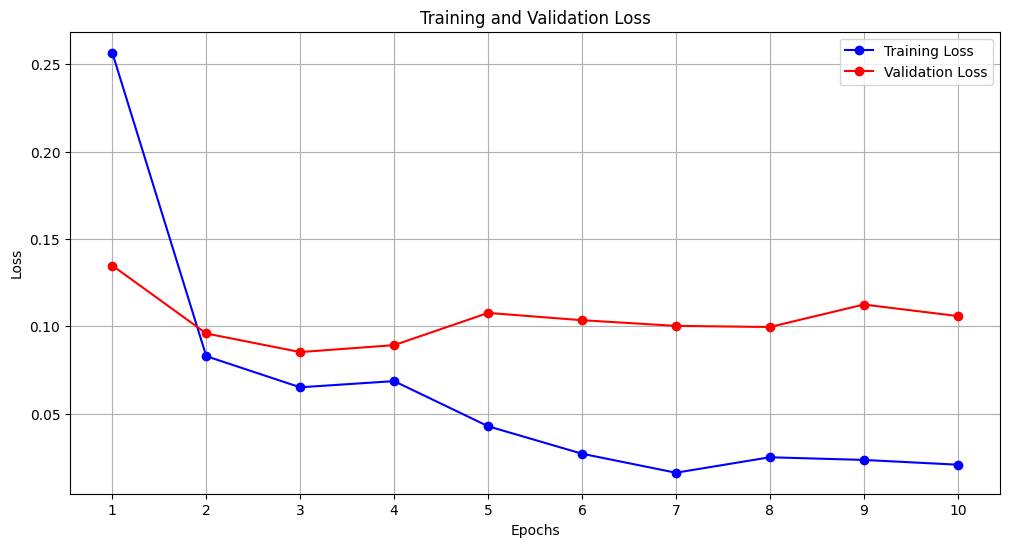

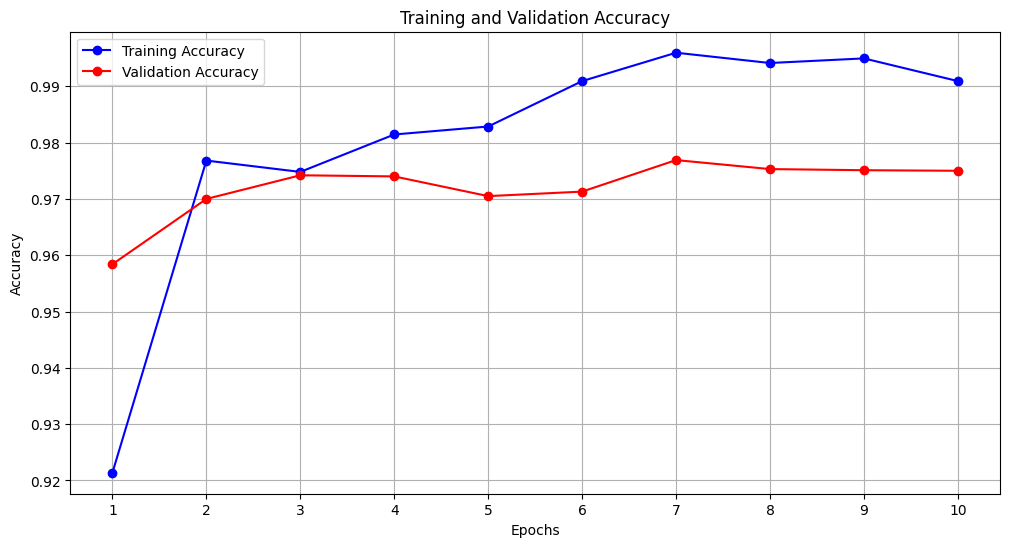

In [54]:
# metrics.csv를 보면 기록된게 뭔가 요상하긴 한데 일단 그냥 넘어가자.

# 에포크별 훈련 및 검증 손실 그래프
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # x축에 모든 에포크 표시
plt.show()

# 에포크별 훈련 및 검증 정확도 그래프
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # x축에 모든 에포크 표시
plt.show()

In [55]:
trainer.test(model, test_loader)

MisconfigurationException: No `test_step()` method defined to run `Trainer.test`.

vscode에서 편집했을 떄 출력결과가 길면 깃허브에 이상하게 올라는 것으로 보임. nbformat으로 다시 직렬화해서 문제를 해결해보자.